In [ ]:
# Load data 
import pandas as pd
cleaned_train_data = pd.read_csv('cleaned_train_data.csv')
cleaned_test_data = pd.read_csv('cleaned_test_data.csv')

Listing.Price.ClosePrice                 1.000000
CensusBlock_Score                        0.872644
TotalBathrooms                           0.554806
Structure.LivingArea                     0.461958
Structure.Rooms.RoomsTotal               0.396648
Income                                   0.354625
Structure.BedroomsTotal                  0.301294
Structure.FireplacesTotal                0.277526
ImageData.style.stories.summary.label    0.188195
ImageData.features_reso.results          0.173357
ImageData.room_type_reso.results         0.172634
Structure.NewConstructionYN              0.140172
Structure.Basement                       0.127114
Structure.Cooling                        0.073114
Property_Type_commercial sale            0.071693
Property_Type_farm                       0.050182
Structure.GarageSpaces                   0.014925
Property_Type_business opportunity       0.010147
Property_Type_residential income         0.006576
Property_Type_commercial lease          -0.013612


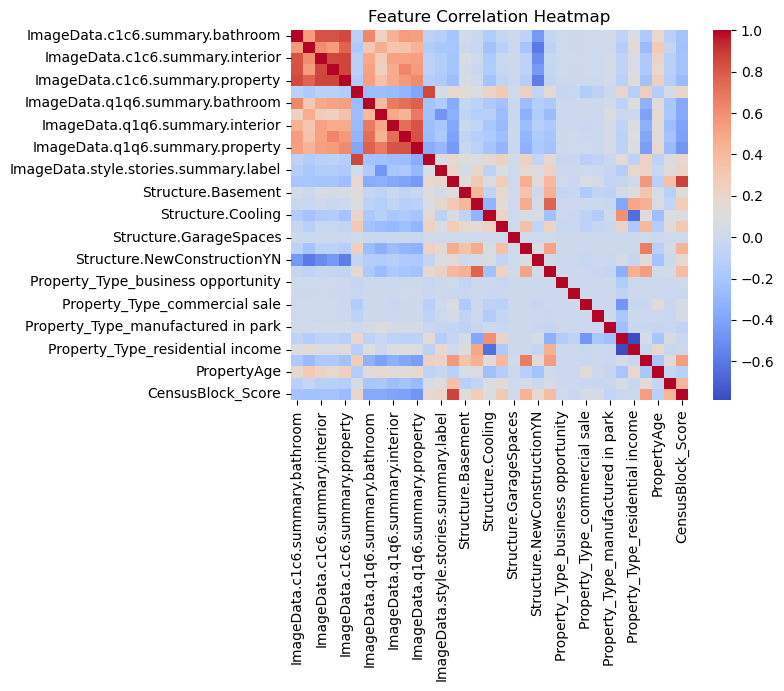

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display correlations between features with the price
correlation = cleaned_train_data.drop(columns=['Listing.ListingId']).corr()
print(correlation['Listing.Price.ClosePrice'].sort_values(ascending=False))
sns.heatmap(correlation, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [195]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#Separate our data in train and test data (test data is only for the submission to evaluate)
data_subset = cleaned_train_data
# Separate features and target variable
X = data_subset.drop(columns=['Listing.Price.ClosePrice', 'Listing.ListingId', 'Structure.GarageSpaces', 'Structure.Cooling', 'Property_Type_commercial sale', 'Property_Type_farm', 'Property_Type_business opportunity', 'Property_Type_residential income', 'Property_Type_commercial lease', 'Property_Type_residential', 'Property_Type_manufactured in park'], errors='ignore')
y = data_subset['Listing.Price.ClosePrice']

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest with reasonable defaults
rf_model = RandomForestRegressor(
    n_estimators=200,     # Number of trees
    max_depth=20,         # Limit tree depth for better generalization
    min_samples_split=5,  # Minimum samples required to split an internal node
    min_samples_leaf=5,   # Minimum samples required in a leaf node
    bootstrap=True,       # Use bootstrap samples
    random_state=42,      # For reproducibility
    n_jobs=-1             # Use all available CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_valid)

# Evaluate the model
mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
variance_y = np.var(y_valid)
accuracy = 1 - (mse / variance_y)

# Print results
print(f"Random Forest - Validation MSE: {mse:,.2f}")
print(f"Random Forest - Validation MAE: {mae:,.2f}")
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest - Validation MSE: 23,656,678,391.25
Random Forest - Validation MAE: 50,740.45
Random Forest Accuracy: 82.86%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Train model with all training data and test for the submission

# Separate features and target variable. Drop irrelevant columns based on correlation coefficients
X_train = cleaned_train_data.drop(columns=['Listing.Price.ClosePrice', 'Listing.ListingId', 'Structure.GarageSpaces', 'Structure.Cooling'], errors='ignore')
y_train = cleaned_train_data['Listing.Price.ClosePrice']

X_valid = cleaned_test_data.drop(columns=['Structure.GarageSpaces', 'Structure.Cooling'], errors='ignore')
y_train = cleaned_train_data['Listing.Price.ClosePrice']

# Initialize Random Forest with reasonable defaults
rf_model = RandomForestRegressor(
    n_estimators=200,     # Number of trees
    max_depth=20,         # Limit tree depth for better generalization
    min_samples_split=5,  # Minimum samples required to split an internal node
    min_samples_leaf=5,   # Minimum samples required in a leaf node
    bootstrap=True,       # Use bootstrap samples
    random_state=42,      # For reproducibility
    n_jobs=-1             # Use all available CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_valid.drop(columns=["Listing.ListingId"]))




In [ ]:
predictions_df = pd.DataFrame({
    'Listing.ListingId': X_valid['Listing.ListingId'],  # Replace with the actual column for IDs
    'Listing.Price.ClosePrice': y_pred
})

# Save the predictions to a CSV file to deliver
predictions_df.to_csv('predicted_prices.csv', index=False)

print("Predicted prices have been saved to 'predicted_prices.csv'.")

Predicted prices have been saved to 'predicted_prices.csv'.
